## Churn Prediction for a telecom company 

In [61]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 

sns.set(style = 'white')

In [62]:
df = pd.read_csv('train.csv', index_col = False)

In [63]:
df.columns.values

array(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE',
       'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH',
       'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION',
       'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'LEAVE'],
      dtype=object)

In [64]:
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                           int64
dtype: object

#### Understanding the data 

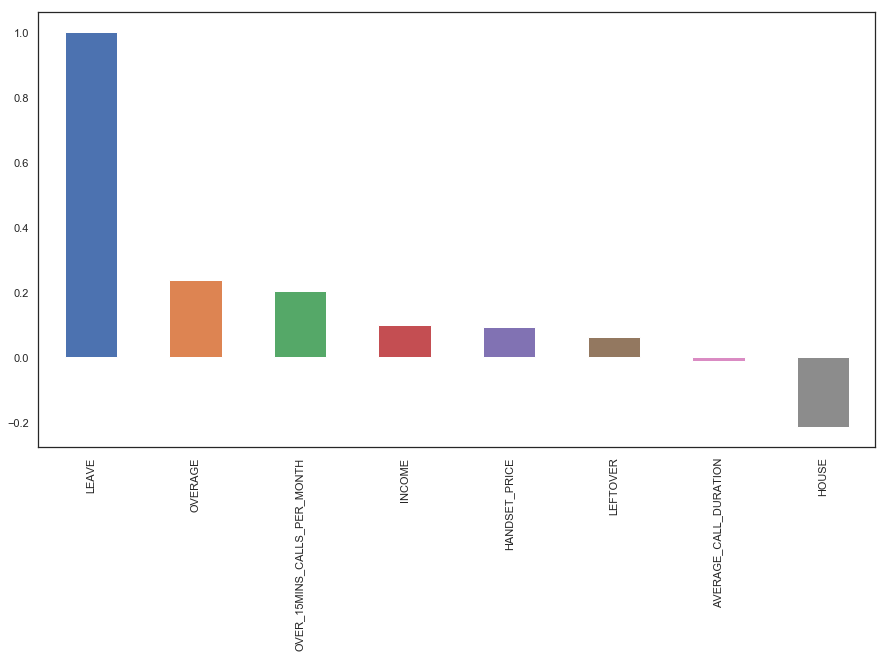

In [65]:
#Get Correlation of "LEAVE" with other variables:
plt.figure(figsize=(15,8))
df.corr()['LEAVE'].sort_values(ascending = False).plot(kind='bar')

In [66]:
df.select_dtypes(include = ['object']).copy().head()

,COLLEGE,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,zero,unsat,very_little,considering
1,zero,unsat,avg,actively_looking_into_it
2,one,very_unsat,high,perhaps
3,zero,very_unsat,little,considering
4,one,very_unsat,avg,perhaps


In [67]:
cleanup_nums = {'COLLEGE': {'zero': 0, 'one': 1}}
df.replace(cleanup_nums, inplace = True)
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0,28987,191,20,175953,217,28,5,unsat,very_little,considering,1
1,0,45201,0,0,841177,160,1,15,unsat,avg,actively_looking_into_it,0
2,1,110663,0,0,902611,529,1,13,very_unsat,high,perhaps,0
3,0,40646,169,71,772903,146,24,2,very_unsat,little,considering,1
4,1,132530,0,10,196535,559,0,6,very_unsat,avg,perhaps,0


In [68]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,LEAVE,REPORTED_SATISFACTION_avg,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,28987,191,20,175953,217,28,5,1,0,...,0,0,0,0,1,0,1,0,0,0
1,0,45201,0,0,841177,160,1,15,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,110663,0,0,902611,529,1,13,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,40646,169,71,772903,146,24,2,1,0,...,0,0,1,0,0,0,1,0,0,0
4,1,132530,0,10,196535,559,0,6,0,0,...,1,0,0,0,0,0,0,0,0,1


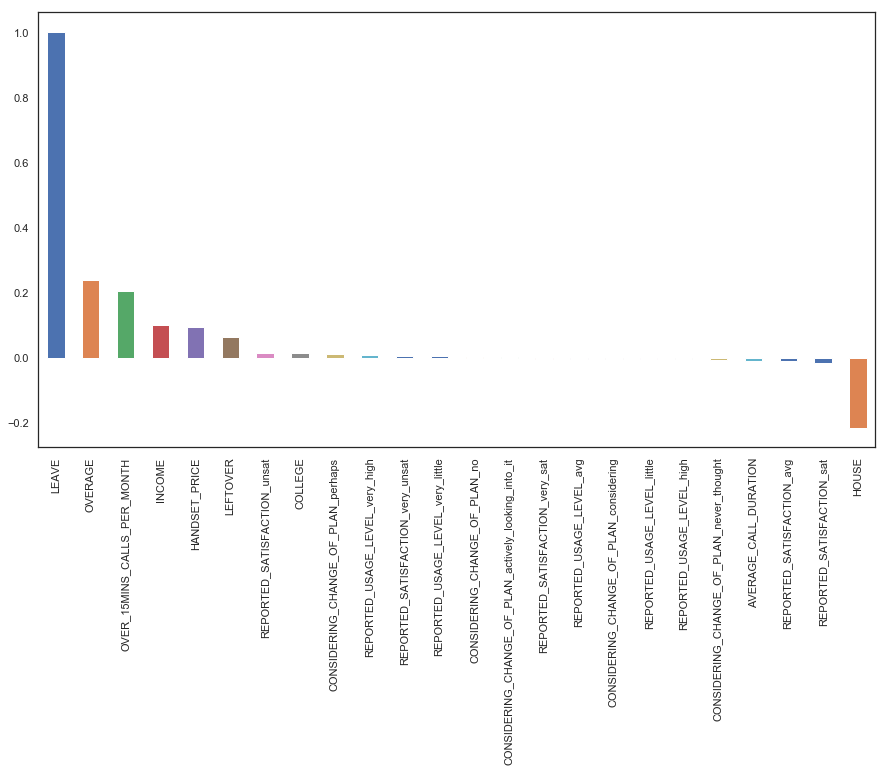

In [69]:
#Get Correlation of "LEAVE" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['LEAVE'].sort_values(ascending = False).plot(kind='bar')

#### 'OVERAGE' and 'OVER_15_MINS_CALLS_PER_MONTH' are positively correlated with 'LEAVE' while 'HOUSE' is negatively correlated. This means that customers who have higher house value tend not not leave. While overage customers and cutomers who make more number of long duration calls tend to leave.

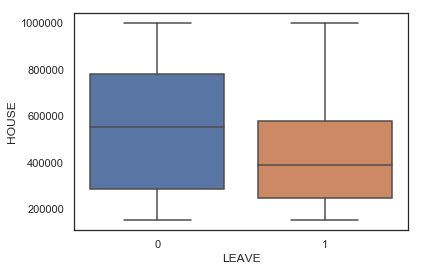

In [70]:
sns.boxplot(x = df.LEAVE, y = df.HOUSE)

#### As expected, customers with higher house values stay with the network. 

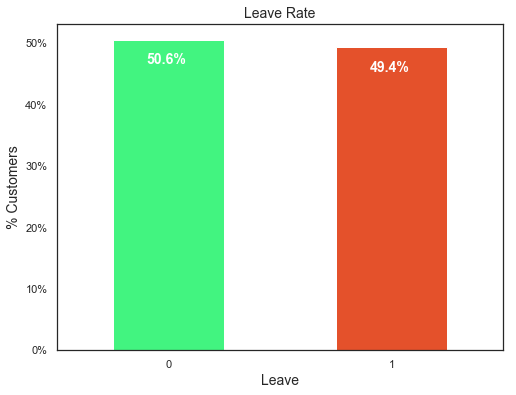

In [71]:
#Leave rate of the customers.
colors = ['#42f480','#E4512B']
ax = (df['LEAVE'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Leave',size = 14)
ax.set_title('Leave Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

#### The above barplot shows that the data is pretty evenly distributed.

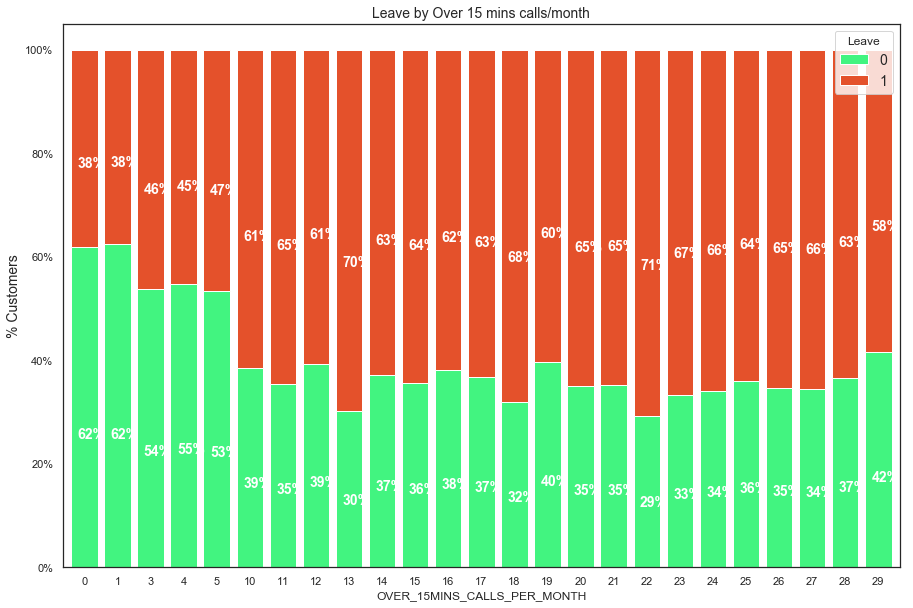

In [72]:
colors = ['#42f480','#E4512B']
longCalls_leave = df.groupby(['OVER_15MINS_CALLS_PER_MONTH','LEAVE']).size().unstack()

ax = (longCalls_leave.T*100.0 / longCalls_leave.T.sum()).T.plot(kind='bar',
                                                                width = 0.8,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (15,10),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Leave')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Leave by Over 15 mins calls/month',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

#### 60% of the customers who make more than  5 'OVER_15MINS_CALLS' per month, leave.

In [73]:
# Defining Features(X) and labels(y)
Y = df['LEAVE']
X = df_dummies.drop('LEAVE', axis = 1)
X.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_avg,REPORTED_SATISFACTION_sat,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,28987,191,20,175953,217,28,5,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,45201,0,0,841177,160,1,15,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,110663,0,0,902611,529,1,13,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,40646,169,71,772903,146,24,2,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,132530,0,10,196535,559,0,6,0,0,...,1,0,0,0,0,0,0,0,0,1


In [74]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [75]:
# Splitting the data into train and test data for Cross-validation, we have used 20% of train data(train.csv file) as 
# test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=0) 

In [76]:
X_train.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_avg,REPORTED_SATISFACTION_sat,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
2465,1.0,0.980954,0.189911,0.550562,0.962514,0.565670,0.172414,0.357143,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8461,0.0,0.240520,0.528190,0.674157,0.111578,0.312094,0.862069,0.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13734,1.0,0.738234,0.005935,0.000000,0.854536,0.561769,0.000000,0.714286,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
965,1.0,0.499021,0.605341,0.224719,0.047221,0.344603,0.965517,0.357143,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4615,1.0,0.364512,0.005935,0.000000,0.783519,0.163849,0.034483,1.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
X_test.shape
X_train.columns

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_avg', 'REPORTED_SATISFACTION_sat',
       'REPORTED_SATISFACTION_unsat', 'REPORTED_SATISFACTION_very_sat',
       'REPORTED_SATISFACTION_very_unsat', 'REPORTED_USAGE_LEVEL_avg',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')

### Decision Tree 

In [78]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth  = 5, min_samples_split = 490, random_state = 0)

##### Using GridsearchCV to fine tune the hyperparamters. (Need to run this only once) 

In [79]:
'''
Tuning and finding the best hyperparameters for the classifier using GridSearchCV.
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'random_state': np.arange(0,102)}
#creating the pipeline
CV = GridSearchCV(tree, param_grid, cv=5, verbose = 1, n_jobs = 8)
#fit the grid with data
CV.fit(X_train, y_train)
CV.best_params_
'''

"\nTuning and finding the best hyperparameters for the classifier using GridSearchCV.\nparam_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'random_state': np.arange(0,102)}\n#creating the pipeline\nCV = GridSearchCV(tree, param_grid, cv=5, verbose = 1, n_jobs = 8)\n#fit the grid with data\nCV.fit(X_train, y_train)\nCV.best_params_\n"

In [80]:
tree.fit(X_train, y_train)
predict_y = tree.predict(X_test)
acc_tree = tree.score(X_test, y_test)
print("Accuracy: %0.6f" % accuracy)
tree_scores = cross_val_score(tree, X_train, y_train, cv=3)  
print("Cross_Val_Score: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
tree_auc = roc_auc_score(y_test, predict_y)
print("AUC: %0.6f" % tree_auc)

Accuracy: 0.699167
Cross_Val_Score: 0.70 (+/- 0.01)
AUC: 0.699057


### Gradient Boosting 

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()

In [82]:
'''
Tuning and finding the best hyperparameters for the classifier using GridSearchCV.
param_grid = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}
#creating the pipeline
CV = GridSearchCV(logreg, param_grid, cv=5, verbose = 1, n_jobs = 8)
#fit the grid with data
CV.fit(X_train, y_train)
CV.best_params_
'''

"\nTuning and finding the best hyperparameters for the classifier using GridSearchCV.\nparam_grid = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}\n#creating the pipeline\nCV = GridSearchCV(logreg, param_grid, cv=5, verbose = 1, n_jobs = 8)\n#fit the grid with data\nCV.fit(X_train, y_train)\nCV.best_params_\n"

In [83]:
GB = GradientBoostingClassifier(learning_rate = 0.005, n_estimators = 1500)
GB.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [84]:
Y_pred_GB = GB.predict(X_test)
acc_GB = accuracy_score(y_test, Y_pred_GB)
print("Accuracy: %0.2f" % acc_GB)
GB_scores = cross_val_score(GB, X_train, y_train, cv=3)  
print("Cross_Val_Score: %0.2f (+/- %0.2f)" % (GB_scores.mean(), GB_scores.std() * 2))
GB_auc = roc_auc_score(y_test, Y_pred_GB)
print("AUC: %0.2f" % GB_auc)

Accuracy: 0.70
Cross_Val_Score: 0.70 (+/- 0.01)
AUC: 0.70


### K Nearest Neighbors 

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)

In [86]:
'''
Tuning and finding the best hyperparameters for the classifier using GridSearchCV.
param_grid = {'n_neighbors': [1,2,3,4,5,6,7]}
#creating the pipeline
CV = GridSearchCV(logreg, param_grid, cv=5, verbose = 1, n_jobs = 8)
#fit the grid with data
CV.fit(X_train, y_train)
CV.best_params_
'''

"\nTuning and finding the best hyperparameters for the classifier using GridSearchCV.\nparam_grid = {'n_neighbors': [1,2,3,4,5,6,7]}\n#creating the pipeline\nCV = GridSearchCV(logreg, param_grid, cv=5, verbose = 1, n_jobs = 8)\n#fit the grid with data\nCV.fit(X_train, y_train)\nCV.best_params_\n"

In [87]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [88]:
Y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, Y_pred_knn)
print("Accuracy: %0.2f" % acc_knn)

knn_scores = cross_val_score(knn, X_train, y_train, cv=3)  
print("Cross_Val_Score: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))
knn_auc = roc_auc_score(y_test, Y_pred_knn)
print("AUC: %0.2f" % knn_auc)

Accuracy: 0.59
Cross_Val_Score: 0.59 (+/- 0.01)
AUC: 0.59


### Logistic Regression 

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [90]:
'''
Tuning and finding the best hyperparameters for the classifier using GridSearchCV.
param_grid = {'C':np.logspace(-3,3,7)}
#creating the pipeline
CV = GridSearchCV(logreg, param_grid, cv=5, verbose = 1, n_jobs = 8)
#fit the grid with data
CV.fit(X_train, y_train)
CV.best_params_
'''

"\nTuning and finding the best hyperparameters for the classifier using GridSearchCV.\nparam_grid = {'C':np.logspace(-3,3,7)}\n#creating the pipeline\nCV = GridSearchCV(logreg, param_grid, cv=5, verbose = 1, n_jobs = 8)\n#fit the grid with data\nCV.fit(X_train, y_train)\nCV.best_params_\n"

In [91]:
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
Y_pred_reg = logreg.predict(X_test)
acc_reg = accuracy_score(y_test, Y_pred_reg)
print("Accuracy: %0.2f" % acc_reg)

reg_scores = cross_val_score(knn, X_train, y_train, cv=5)  
print("Cross_Val_Score: %0.2f (+/- %0.2f)" % (reg_scores.mean(), reg_scores.std() * 2))
reg_auc = roc_auc_score(y_test, Y_pred_reg)
print("AUC: %0.2f" % reg_auc)

Accuracy: 0.64
Cross_Val_Score: 0.60 (+/- 0.01)
AUC: 0.64


### Support Vector Machine 

In [93]:
from sklearn import svm 
svc = svm.SVC(gamma="scale")

In [94]:
'''
Tuning and finding the best hyperparameters for the classifier using GridSearchCV.
param_grid = {'kernel':('linear', 'rbf'), 'C':np.logspace(-3,3,7)}
#creating the pipeline
CV = GridSearchCV(svc, param_grid, cv=5, verbose = 1, n_jobs = 8)
#fit the grid with data
CV.fit(X_train, y_train)
CV.best_params_
'''

"\nTuning and finding the best hyperparameters for the classifier using GridSearchCV.\nparam_grid = {'kernel':('linear', 'rbf'), 'C':np.logspace(-3,3,7)}\n#creating the pipeline\nCV = GridSearchCV(svc, param_grid, cv=5, verbose = 1, n_jobs = 8)\n#fit the grid with data\nCV.fit(X_train, y_train)\nCV.best_params_\n"

In [95]:
svc = svm.SVC(C = 10, kernel = 'rbf')
svc.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
Y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, Y_pred_svc)
print("Accuracy: %0.2f" % acc_svc)
svm_scores = cross_val_score(svc, X_train, y_train, cv=3)  
print("Cross_Val_Score: %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std() * 2))
svm_auc = roc_auc_score(y_test, Y_pred_svc)
print("AUC: %0.2f" % svm_auc)

Accuracy: 0.66
Cross_Val_Score: 0.66 (+/- 0.01)
AUC: 0.66


### Neural Network 

In [97]:
from sklearn.neural_network import MLPClassifier
nnet = MLPClassifier()

In [98]:
'''
Tuning and finding the best hyperparameters for the classifier using GridSearchCV.
param_grid = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(8, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
#creating the pipeline
CV = GridSearchCV(nnet, param_grid, cv=5, verbose = 1, n_jobs = 8)
#fit the grid with data
CV.fit(X_train, y_train)
CV.best_params_
'''

"\nTuning and finding the best hyperparameters for the classifier using GridSearchCV.\nparam_grid = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(8, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}\n#creating the pipeline\nCV = GridSearchCV(nnet, param_grid, cv=5, verbose = 1, n_jobs = 8)\n#fit the grid with data\nCV.fit(X_train, y_train)\nCV.best_params_\n"

In [99]:
nnet = MLPClassifier(alpha = 0.001, hidden_layer_sizes = 14, max_iter = 1900, random_state = 6, solver = 'lbfgs')
nnet.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=14, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1900, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=6, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [100]:
Y_pred_nnet = nnet.predict(X_test)
acc_nnet = accuracy_score(y_test, Y_pred_nnet)
print("Accuracy: %0.2f" % acc_nnet)
nnet_scores = cross_val_score(nnet, X_train, y_train, cv=3)  
print("Cross_Val_Score: %0.2f (+/- %0.2f)" % (nnet_scores.mean(), nnet_scores.std() * 2))
nnet_auc = roc_auc_score(y_test, Y_pred_nnet)
print("AUC: %0.2f" % nnet_auc)

Accuracy: 0.68
Cross_Val_Score: 0.66 (+/- 0.01)
AUC: 0.67


### Random Forest 

In [101]:
from sklearn.ensemble import RandomForestClassifier
randForest = RandomForestClassifier()

In [102]:
'''
Tuning and finding the best hyperparameters for the classifier using GridSearchCV.
param_grid = {'n_estimators': [100, 200], 'max_depth': range(3,10,1), 'random_state': range(0,102,2), 'criterion': ['gini',  'entropy']
}
#creating the pipeline
CV_randForest = GridSearchCV(randForest, param_grid, cv=5, verbose = 1, n_jobs = 8)
#fit the grid with data
CV_randForest.fit(X_train, y_train)
CV_randForest.best_params_
'''

"\nTuning and finding the best hyperparameters for the classifier using GridSearchCV.\nparam_grid = {'n_estimators': [100, 200], 'max_depth': range(3,10,1), 'random_state': range(0,102,2), 'criterion': ['gini',  'entropy']\n}\n#creating the pipeline\nCV_randForest = GridSearchCV(randForest, param_grid, cv=5, verbose = 1, n_jobs = 8)\n#fit the grid with data\nCV_randForest.fit(X_train, y_train)\nCV_randForest.best_params_\n"

In [103]:
randForest = RandomForestClassifier(n_estimators= 100, max_depth=8, random_state = 46, criterion = 'entropy')
randForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=46, verbose=0, warm_start=False)

In [104]:
Y_pred_randForest = randForest.predict(X_test)
acc_randForest = accuracy_score(y_test, Y_pred_randForest)
print("Accuracy: %0.2f" % acc_randForest)
randForest_scores = cross_val_score(randForest, X_train, y_train, cv=3)  
print("Cross_Val_Score: %0.2f (+/- %0.2f)" % (randForest_scores.mean(), randForest_scores.std() * 2))
randForest_auc = roc_auc_score(y_test, Y_pred_randForest)
print("AUC: %0.2f" % randForest_auc)

Accuracy: 0.70
Cross_Val_Score: 0.70 (+/- 0.01)
AUC: 0.70


In [105]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Gradient Boosting', 'KNN', 
              'Logistic Regression', 'SVM', 'Neural Network', 'Random Forest'],
    'Accuracy': [acc_tree, acc_GB, acc_knn, acc_reg, acc_svc, acc_nnet, acc_randForest],
    'Cross_Val_score': [tree_scores.mean(), GB_scores.mean(), knn_scores.mean(), reg_scores.mean(), svm_scores.mean(), nnet_scores.mean(), randForest_scores.mean()],
    'AUC': [tree_auc, GB_auc, knn_auc, reg_auc, svm_auc, nnet_auc, randForest_auc]})
models.sort_values(by='AUC', ascending=False)

,Model,Accuracy,Cross_Val_score,AUC
1,Gradient Boosting,0.703889,0.699653,0.704411
6,Random Forest,0.701667,0.697292,0.700991
0,Decision Tree,0.699167,0.698056,0.699057
5,Neural Network,0.675278,0.664931,0.674636
4,SVM,0.663056,0.661458,0.660422
3,Logistic Regression,0.637500,0.597639,0.636981
2,KNN,0.592500,0.591944,0.591948
